In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import imageio
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy.stats import gaussian_kde

In [2]:
import riskModelPercept as model

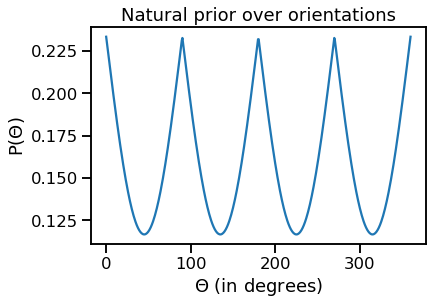

In [6]:
plt.plot(model.stim_grid*180/np.pi, model.prior(model.stim_grid))
model.value_function_ori((4./180.)*np.pi, type = "prior")
plt.title("Natural prior over orientations")
plt.xlabel("$\Theta$ (in degrees)")
plt.ylabel("P($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

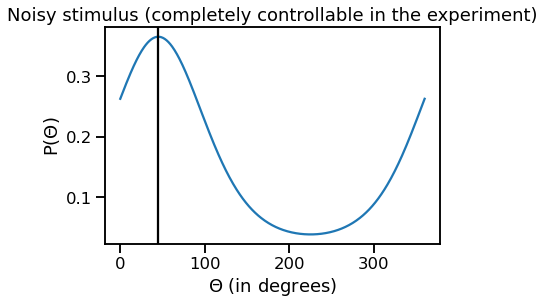

In [7]:
# a, b = model.MI_efficient_encoding(1.9*np.pi, sigma_stim, sigma_rep)
# np.shape(a)
# # np.shape(b)
# plt.plot(np.squeeze(a))
theta0 = 0.25*np.pi
sigma_stim = 0.3*np.pi

plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, sd=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
plt.axvline(theta0*180./np.pi, c='k')

plt.title("Noisy stimulus (completely controllable in the experiment)")
plt.xlabel("$\Theta$ (in degrees)")
plt.ylabel("P($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

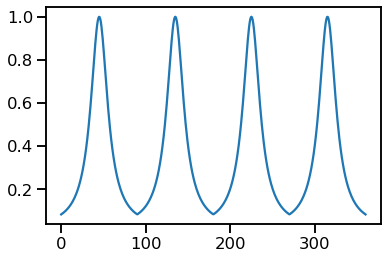

In [738]:
# plt.plot(np.diff(np.square(1/model.value_function_ori(model.stim_grid, type = "prior"))))
plt.plot(model.stim_grid*180/np.pi, 1/model.value_function_ori(model.stim_grid, type = "prior"))

In [9]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[0, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[50, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[99, ...])

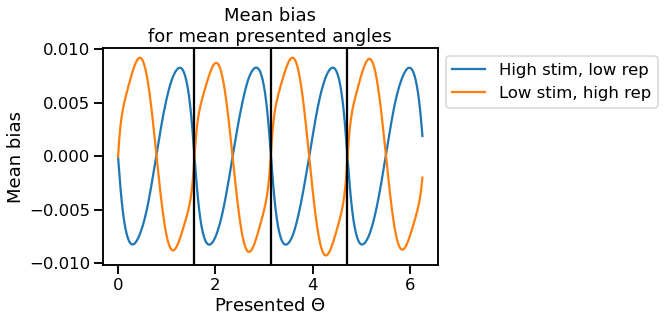

In [1256]:
theta0 = np.linspace(0.001, 1.99*np.pi, 500) #0.8

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

low_risky_rep = 1*low_rep_noise
high_risky_rep = 1*high_rep_noise


# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises high")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_rep_noise)
plt.plot(theta0, E_theta_given_theta0 - theta0, label = "High stim, low rep")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, low_stim_noise, high_rep_noise)
plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Low stim, high rep")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, low_stim_noise, low_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises low")



# #risky

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_risky_rep)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "High stim, low rep - risky")


# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_risky_rep)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Low stim, high rep - risky")







plt.axvline(0.5*np.pi, c='k')
plt.axvline(np.pi, c='k')
plt.axvline(1.5*np.pi, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title("Mean bias\nfor mean presented angles")
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

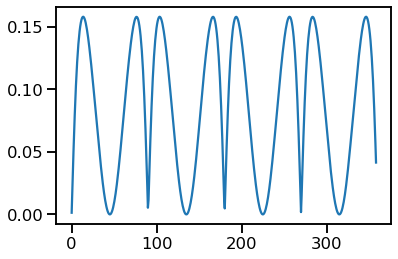

In [1327]:
type = "prior"
E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_rep_noise)
val_bias = model.value_function_ori(E_theta_given_theta0, type) - model.value_function_ori(theta0, type)
plt.plot(theta0*180./np.pi, val_bias)

In [1328]:
risky_ori = 22.5/180.0*np.pi
risk_prob = 0.75
sigma_stim = high_stim_noise
sigma_rep = low_rep_noise
risk_rep = sigma_rep*1.0
percieved_risky_ori = model.expected_thetahat_theta0(risky_ori, sigma_stim, risk_rep)
model.value_function_ori(risky_ori, type)*risk_prob, model.value_function_ori(percieved_risky_ori, type)*risk_prob



(3.1663690552109838, array([3.2588629]))

In [1329]:

safe_ori = 29.1477/180.0*np.pi
risk_rep = sigma_rep*1.0
percieved_safe_ori = model.expected_thetahat_theta0(safe_ori, sigma_stim, sigma_rep)
model.value_function_ori(safe_ori, type), model.value_function_ori(percieved_safe_ori, type)


(2.641541889745479, array([2.71761871]))

4.875006666666667

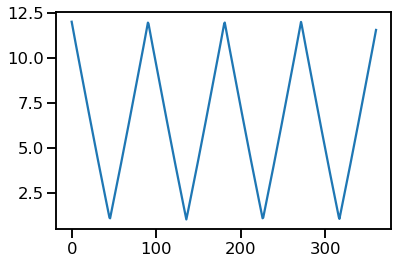

In [1258]:
plt.plot(model.stim_grid*180./np.pi,model.value_function_ori(E_theta_given_theta0, type = "linearPrior"))

In [1137]:
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, sd=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

In [48]:
# Sensory encodings throughout theta


high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = high_stim_noise
sigma_rep =  low_rep_noise
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.rep_grid, (model.MI_efficient_encoding(theta0 ,sigma_stim, sigma_rep)[0][0,...]))
    plt.title("$\Theta_0$ = %02d° in high stim and low rep noise" %(theta0*180/np.pi))
#     plt.ylim((0,350))
    plt.xlabel("Neural firing rate (representation)")
    plt.ylabel("Representation distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [52]:
# Bayesian decodings throughout theta


high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = high_stim_noise
sigma_rep =  high_rep_noise
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180/np.pi, (model.bayesian_decoding(theta0 ,sigma_stim, sigma_rep))[0, ...])
    mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
    
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %.2f°'%((theta0*180.)/np.pi))
    plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))


    
    plt.legend()
    
    plt.title("Inferred $\Theta$ distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("Inferred Distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()


In [133]:
theta0 = 0.05
model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)*180./np.pi

array([2.90431079])

In [794]:
high_stim_noise = 0.011*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.011
low_rep_noise = 0.001


theta0 = 13*np.pi/180.0
type = "linearPrior"
bins = 100
sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, bins)

Text(0.5, 1.0, '$\\Theta_0$ = 13degrees')

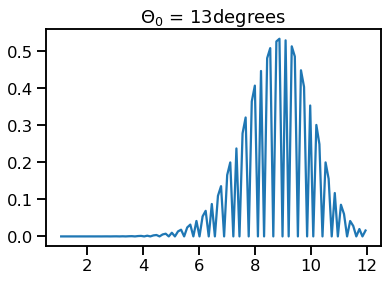

In [795]:
plt.plot(safe_value,safe_prob[0,:])
plt.title("$\Theta_0$ = " + str(round(theta0*180/np.pi))+ "degrees")

In [704]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, bins=25)
    plt.plot(safe_value,safe_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    


In [612]:
interact(plot_safeVal, theta0 = ((0./180.)*np.pi, (45./180.)*np.pi, 2./180.*np.pi), sigma_stim = ((0.1/180.0)*np.pi, (3./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.1/180.0)))

interactive(children=(FloatSlider(value=0.3839724354387525, description='theta0', max=0.7853981633974483, step…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [70]:
# safe values throughout theta

high_stim_noise = 0.014*1.99*np.pi    # 5 degrees
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = high_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_safeVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [637]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risk_prob = 0.75
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type , bins=100)
    plt.plot(risky_value,risky_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    plt.title("risky value")
    
    

In [634]:
interact(plot_riskyVal, theta1 = ((0./180.)*np.pi, (45./180.)*np.pi, 1./180.*np.pi), sigma_stim = ((0.1/180.0)*np.pi, (3./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.1/180.0)))


interactive(children=(FloatSlider(value=0.3839724354387525, description='theta1', max=0.7853981633974483, step…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [638]:
# risky values throughout theta

high_stim_noise = 0.014*1.99*np.pi    # 5 degrees
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_riskyVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nLow stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [1129]:
high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001
medium_rep_noise = 0.007

risk_rep = 2.5*sigma_rep


theta0 = 23.8*np.pi/180.0 #30.124*np.pi/180.0
theta1 = 15.37*np.pi/180.0 #23.8*np.pi/180.0
type = "linearPrior"
bins = 100
sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
risk_prob = 0.75

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, bins)
risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, risk_rep , risk_prob, type , bins)


In [1130]:
# model.value_function_ori(theta0, type) #safe
model.value_function_ori(theta0, type), risk_prob*model.value_function_ori(theta1, type)

(6.182222222222222, 6.182166666666667)

Text(0.5, 1.0, '$\\Theta_0$ = 24degrees')

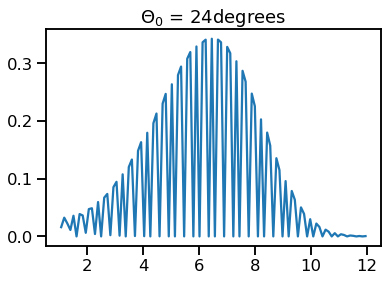

In [1131]:
plt.plot(safe_value,safe_prob[0,:])
plt.title("$\Theta_0$ = " + str(round(theta0*180/np.pi))+ "degrees")

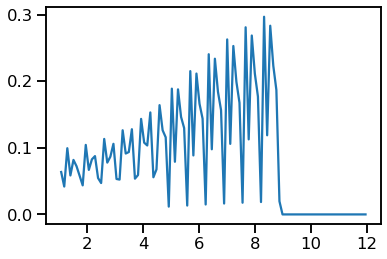

In [1132]:
plt.plot(risky_value,risky_prob[0,:])

In [1133]:
# How often is probability distribution 1 (risky)greater than distribution 2 (safe).
model.diff_dist(safe_value, risky_prob, safe_prob)


array([[0.44673076]])

# Linear Prior

In [1216]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

medium_rep_noise = 0.02


In [1261]:
risky_rep = 1.*sigma_rep

sigma_stim = low_stim_noise
sigma_rep = high_rep_noise

# Getting all the values from actual transformation
rangeOri = np.linspace(38.5/180., 22.5/180., 11)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type, bins=100)

# Risk attitudes
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

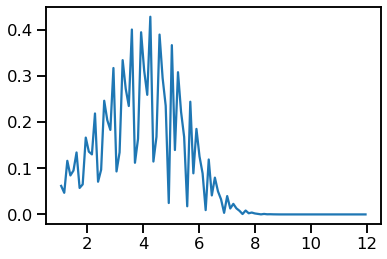

In [1262]:
plt.plot(risky_value,risky_prob[7,:])

In [1352]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "prior"   
    
    risky_rep = 1.3*sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(32.5/180., 22.5/180., 50)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type, bins=100)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [1353]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.002*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))


interactive(children=(FloatSlider(value=0.04376238566450582, description='sigma_stim', max=0.08752477132901164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [1197]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
        
    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linearPrior")

In [1198]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (0.001, 0.014, 0.002))



interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [118]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"

    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linear Prior")

In [119]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.00001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.0069814915409025175, description='sigma_stim', max=0.017453292519943…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

# Inverse Linear Prior

In [939]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

medium_rep_noise = 0.02



In [942]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"   
    
    risky_rep = 1.0*sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(13.5/180., 23.5/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type, bins=100)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [943]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.002*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))



interactive(children=(FloatSlider(value=0.04376238566450582, description='sigma_stim', max=0.08752477132901164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [120]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"
        
    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverseLinearPrior")

In [121]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [122]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [123]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.0/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [124]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(83./180., 87./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(77./180., 83./180., 7)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(65./180., 77./180., 13)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(48./180., 65./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [125]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.00000001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.006981317182510244, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [31]:
# Inverse Linear Prior

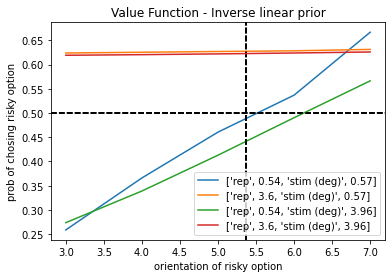

In [58]:
rangeInverseLinear1 = np.linspace(3./180., 7./180., 5)*np.pi
rangeInverseLinear2 = np.linspace(7./180., 14./180., 8)*np.pi
rangeInverseLinear3 = np.linspace(14./180., 26./180., 12)*np.pi
rangeInverseLinear4 = np.linspace(26./180., 43./180., 18)*np.pi

rangeOri = rangeInverseLinear1

sigma_stim_list = [0.001*np.pi,0.007*np.pi]
sigma_rep_list = [0.003, 0.02]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:
        
        sigma_risk_rep = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_risk_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep*180., "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")
    
    

In [ ]:
# Prior

In [ ]:
rangePrior1 = np.linspace(54./180., 61./180., 8)*np.pi
rangePrior2 = np.linspace(61./180., 68./180., 8)*np.pi
rangePrior3 = np.linspace(68./180., 78./180., 11)*np.pi
rangePrior4 = np.linspace(78./180., 88./180., 11)*np.pi

rangeOri = rangePrior1

sigma_stim_list = {"low_stim" : 0.001*np.pi, "high_stim" : 0.014*np.pi}
sigma_rep_list = {"low_rep":0.001, "high_rep":0.014}
risk_prob = 0.75
type = "prior"

i = -1
for sigma_stim in sigma_stim_list:
    i = i+1
    j = -1
    for sigma_rep in sigma_rep_safe_list:
        
        j= j+1
        
        # Now different sigma for risk and safe representation possible
        sigma_risk = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim_list[list(sigma_stim_list.keys())[i]], sigma_rep_list[list(sigma_rep_list.keys())[j]] , type, bins=1000)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim_list[list(sigma_stim_list.keys())[i]], sigma_rep_list[list(sigma_rep_list.keys())[j]], risk_prob, type, bins=1000) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=[list(sigma_stim_list.keys())[i], list(sigma_rep_list.keys())[j]])
        plt.legend(bbox_to_anchor=(1., 1.0))
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
    
    

In [ ]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

In [ ]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "prior"

    rangeOri = np.linspace(54./180., 61./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(61./180., 68./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(68./180., 78./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(78./180., 88./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - prior")

In [ ]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))